In [1]:
##ARIMA AND ARIMAX MODELLING FOR Master_Bdrm VARIABLE##


In [1]:
#importing lib and loading file

from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
from pandas import Series
from statsmodels.tsa.stattools import adfuller

C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
dataset = read_csv('F:/2018/cdac_project/19-072018/final_dataset.csv',index_col='Date_Time',parse_dates=True)

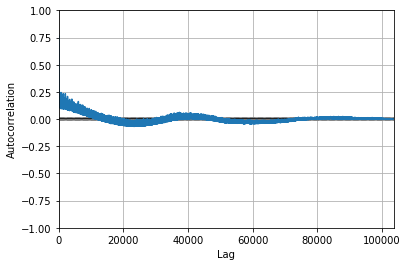

In [3]:
# implementing autocorrelation_plot to select the value of p in ARIMA(p=lag  in autoregression)
Master_Bdrm_df=dataset['2014-01-01':'2017-01-01'].Master_Bdrm
autocorrelation_plot(Master_Bdrm_df)

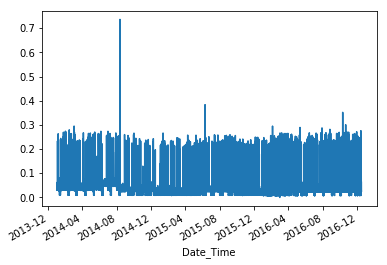

In [4]:
#check for trend visualy
dataset.Master_Bdrm.plot()

In [5]:
#Augmented Dickey-Fuller test 
#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

#from statsmodels.tsa.stattools import adfuller
X = Master_Bdrm_df.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
    
#Result:p-value less the 0.5 so null hypothesis fails(#it is not statonary).Therefore it is stationary and has no unit root.

ADF Statistic: -20.367665
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [6]:
# view summary of model

model = ARIMA(Master_Bdrm_df,order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


                             ARIMA Model Results                              
Dep. Variable:          D.Master_Bdrm   No. Observations:               103674
Model:                 ARIMA(2, 1, 0)   Log Likelihood              250411.580
Method:                       css-mle   S.D. of innovations              0.022
Date:                Mon, 23 Jul 2018   AIC                        -500815.160
Time:                        21:10:58   BIC                        -500776.964
Sample:                    01-01-2014   HQIC                       -500803.587
                         - 12-15-2016                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.157e-07   5.64e-05     -0.006      0.996      -0.000       0.000
ar.L1.D.Master_Bdrm     0.0293      0.003      9.665      0.000       0.023       0.035
ar.L2.D.Master_B

In [7]:
#implementing ARIMA model and getting predictions

X = Master_Bdrm_df.values
size = int(len(X) * 0.99)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()


for t in range(len(test)):
    model = ARIMA(history, order=(1,0,0))
#When fitting the model, a lot of debug information is provided about the fit of the linear regression model. 
#We can turn this off by setting the disp argument to 0.
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    predi = output[0]
    predictions.append(predi)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (predi, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()



C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\nikhil\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


predicted=0.025835, expected=0.025283
predicted=0.025772, expected=0.025250
predicted=0.025746, expected=0.025033
predicted=0.025580, expected=0.025133
predicted=0.025656, expected=0.025167
predicted=0.025682, expected=0.025033
predicted=0.025580, expected=0.025033
predicted=0.025580, expected=0.025050
predicted=0.025592, expected=0.025033
predicted=0.025580, expected=0.024633
predicted=0.025273, expected=0.024617
predicted=0.025260, expected=0.024517
predicted=0.025183, expected=0.024367
predicted=0.025068, expected=0.024250
predicted=0.024979, expected=0.024383
predicted=0.025081, expected=0.024383
predicted=0.025081, expected=0.263283
predicted=0.208386, expected=0.289767
predicted=0.228754, expected=0.024200
predicted=0.024942, expected=0.024300
predicted=0.025019, expected=0.024200
predicted=0.024942, expected=0.024317
predicted=0.025032, expected=0.024400
predicted=0.025096, expected=0.024367
predicted=0.025070, expected=0.024400
predicted=0.025096, expected=0.024400


KeyboardInterrupt: 